**hypothesis**
---
* games with multiple sequels (new mario, fifa, cod etc) will have lower critic ratings w/ higher critic counts
* non e games don't do that well on nintendo consoles
* most nintendo games are platformers
* (combination of top two) most e games are platformers
* critic scores and user scores will often be similar
* "shovelware"(in this case misc (although not all are)) are most predominant on Nintendo consoles
* sport games will be of similar quantity throughout all consoles
* NA holds more than 50% of global sales
* indie/less well known companies will have lower critic reviews, higher user score (still not that high)
* older games will have higher average sales (due to having less "non quality" games back then)

In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [9]:
games = pd.read_csv("../analysis/gamedata.csv")
games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


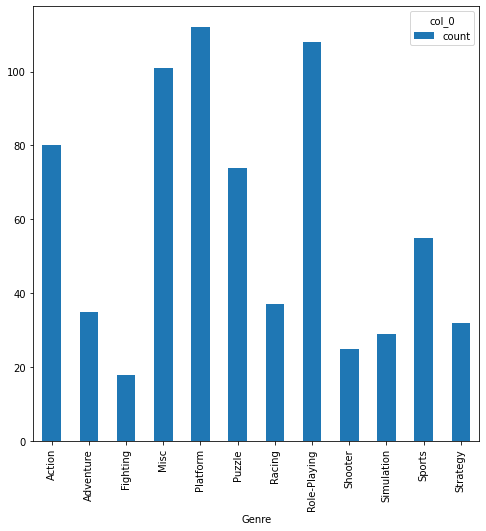

In [7]:
#games[games["Publisher"] == "Nintendo"]["Genre"].value_counts()
nintendo_genre = pd.crosstab(index=games[games["Publisher"] == "Nintendo"]["Genre"],columns="count")
nintendo_genre.plot(kind="bar",figsize =(8,8));

<AxesSubplot:xlabel='Year_of_Release', ylabel='Global_Sales'>

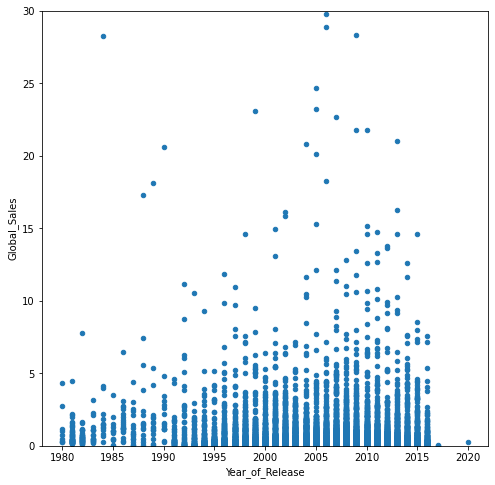

In [21]:
games.plot(kind = "scatter", x="Year_of_Release", y = "Global_Sales", figsize=(8,8),ylim=(0,30))

ValueError: Grouper for '<class 'pandas.core.frame.DataFrame'>' not 1-dimensional